In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')
sns.set(font_scale=2.5)
import pandas  as pd
import missingno as msno
import numpy as np

df= pd.read_csv('penguin.csv')

# 1. EDA - 데이터 및 Null 확인

### 데이터 확인
bill_length_mm : 부리 가로길이 <br>
bill_depth_mm : 부리 세로길이 <br>
flipper_length_mm : 팔 길이 <br>
body_mass_g : 몸무게(g)

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 컬럼마다 value_counts로 데이터 분포 대략적으로 확인

In [84]:
for col in df.columns : 
    print('{}의 value_counts'.format(col))
    print(df[col].value_counts())
    print('='*50)

species의 value_counts
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
island의 value_counts
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
bill_length_mm의 value_counts
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: bill_length_mm, Length: 164, dtype: int64
bill_depth_mm의 value_counts
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: bill_depth_mm, Length: 80, dtype: int64
flipper_length_mm의 value_counts
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
20

### Null값 확인
별로 없네?

species             의 NaN value는 0개, 0.00%
island              의 NaN value는 0개, 0.00%
bill_length_mm      의 NaN value는 2개, 0.58%
bill_depth_mm       의 NaN value는 2개, 0.58%
flipper_length_mm   의 NaN value는 2개, 0.58%
body_mass_g         의 NaN value는 2개, 0.58%
sex                 의 NaN value는 11개, 3.20%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


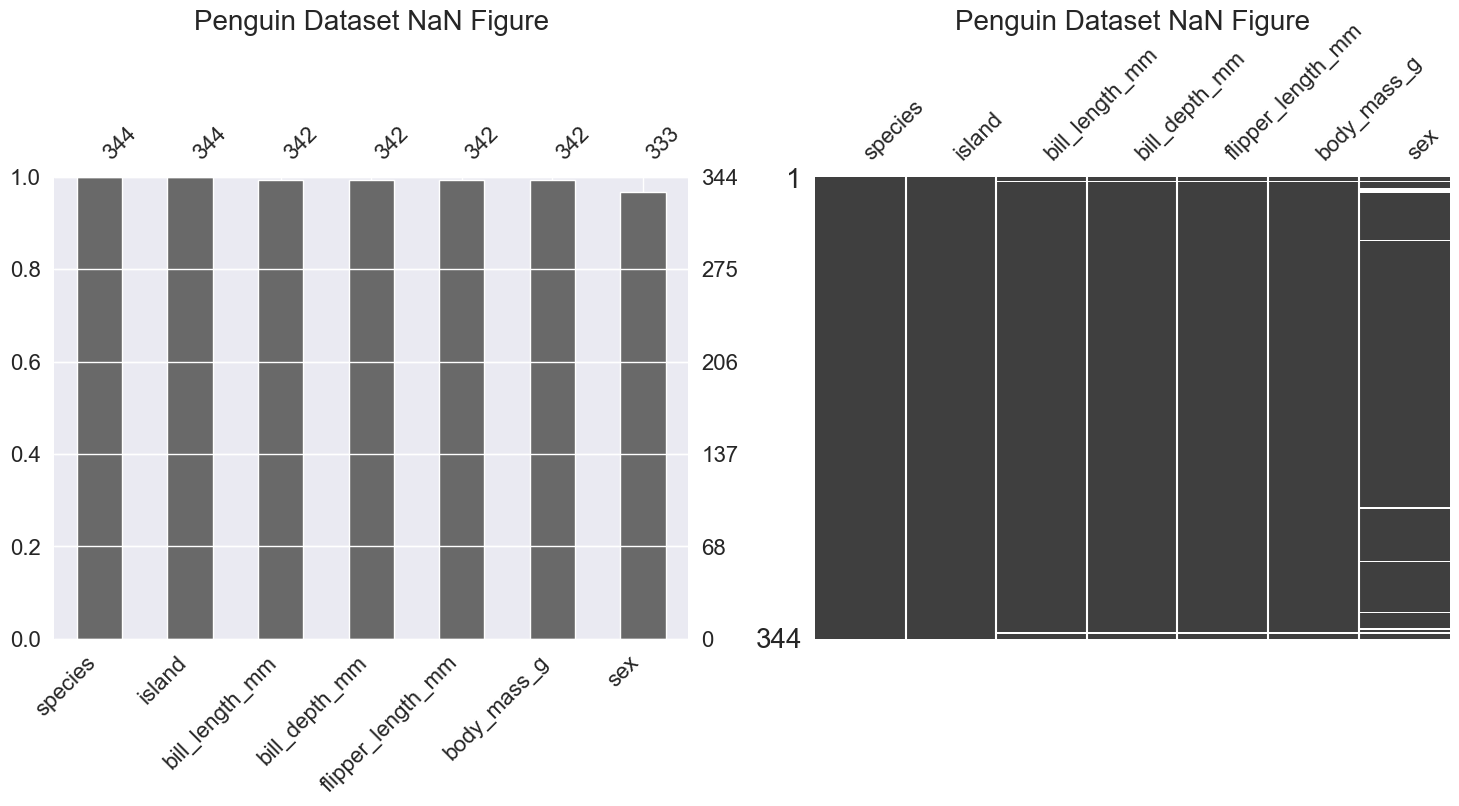

In [82]:
for col in df.columns :
    print('{:<20}의 NaN value는 {}개, {:.2f}%'.format(col, df[col].isnull().sum(), 100*df[col].isnull().sum()/len(df)))

y_position = 1.3
font_size = 20
f,ax = plt.subplots(1,2,figsize=(18,6))

msno.bar(df=df,ax=ax[0])
msno.matrix(df=df,ax=ax[1])
ax[0].set_title('Penguin Dataset NaN Figure', fontsize=font_size, y=y_position)
ax[1].set_title('Penguin Dataset NaN Figure', fontsize=font_size, y=y_position)

plt.show()

# 2. EDA - species, island

### (좌) 아델리와 턱끈은 체중 분포양상이 비슷하지만 젠투는 몸무게가 크다는걸 알 수 있었다.
### (우) Biscoe섬이 대체로 몸무게가 많이 나가고 Torgersen과 Dream은 분포는 비슷하지만 개체수가 Dream이 더 많았다.

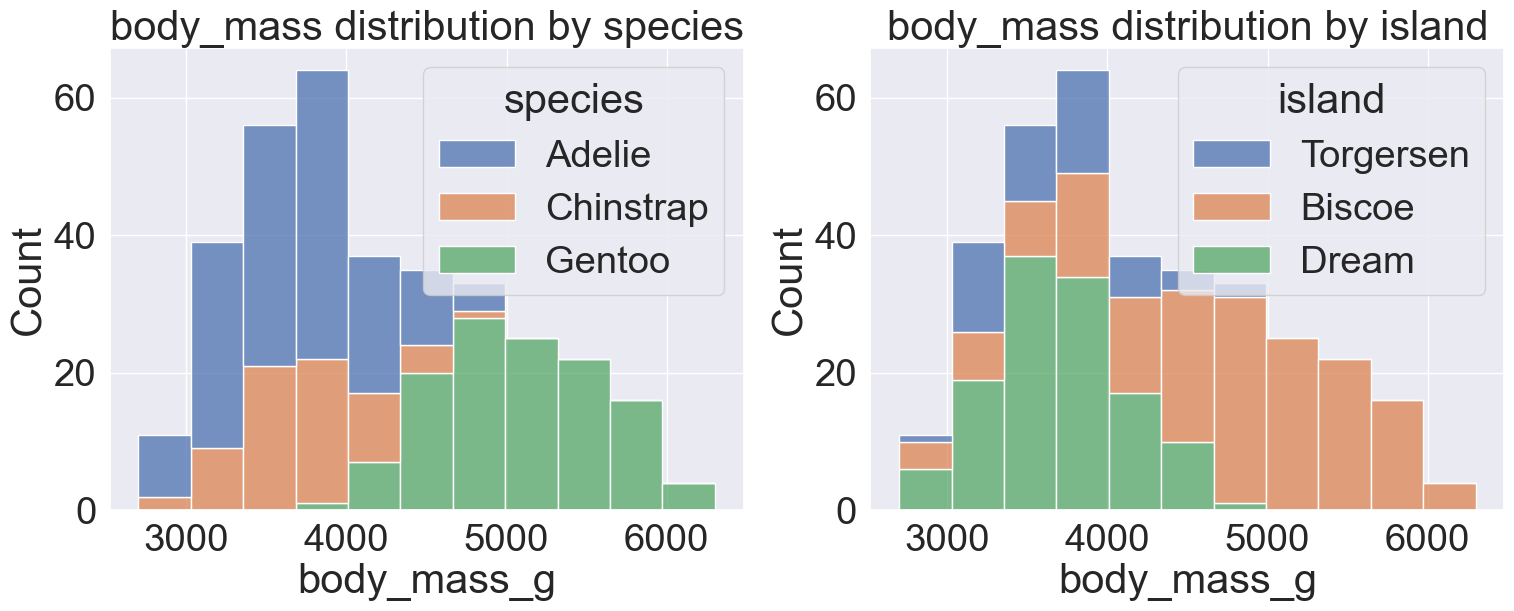

In [61]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='stack', ax=ax[0])
sns.histplot(data=df, x='body_mass_g', hue='island', multiple='stack', ax=ax[1])

ax[0].set_title('body_mass distribution by species')
ax[1].set_title('body_mass distribution by island')
plt.show()

# 3. EDA - bill_length_mm, bill_depth_mm

### (좌) 부리 길이와 체중
### (우) 부리 폭과 체중
부리 길이와 체중은 대략적으로 양의 상관관계가 있는 것 같다.<br>
조금 더 자세히 살펴보기 위해 펭귄 종과 무관하게 bill_length와 body_mass의 경향성이 있는지 확인해보자<br>
부리 폭과 체중은 상관없어 보이지만 hue='species'로 보면 약간의 경향성이 보임

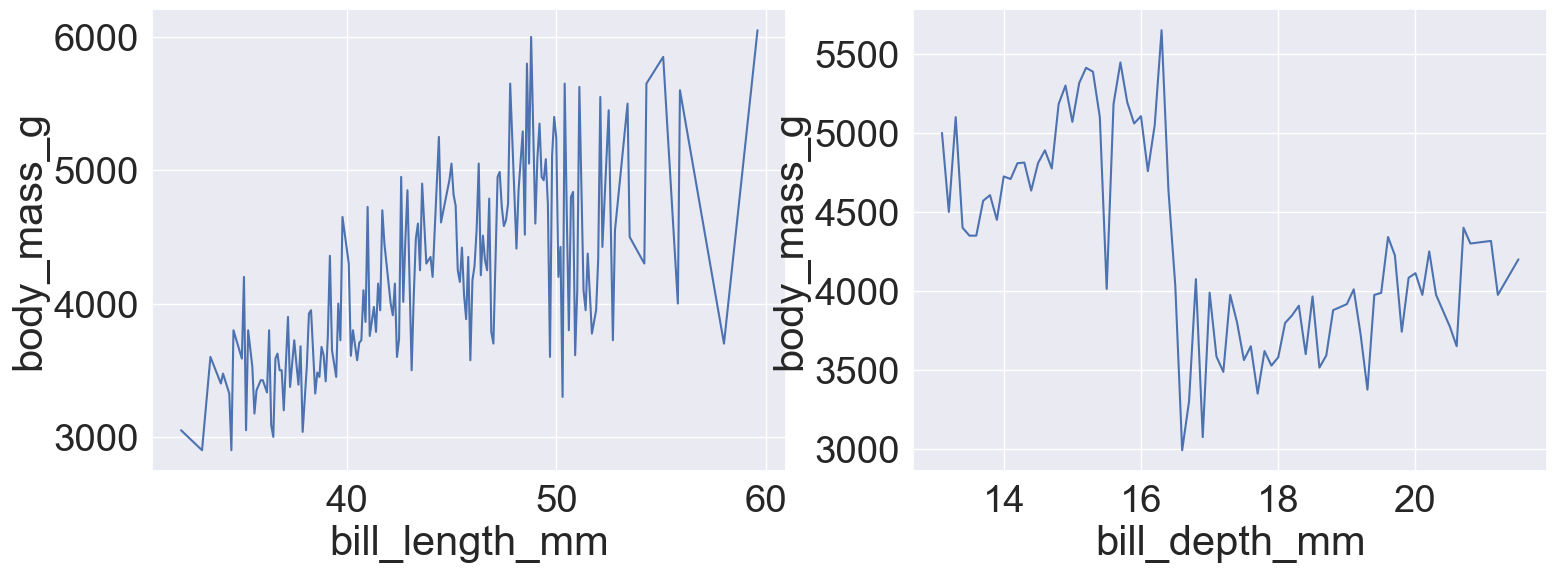

In [43]:
f, ax = plt.subplots(1,2,figsize=(18,6))
sns.lineplot(data=df,x='bill_length_mm',y='body_mass_g',errorbar=None,ax=ax[0])
sns.lineplot(data=df,x='bill_depth_mm',y='body_mass_g',errorbar=None,ax=ax[1])
plt.show()

### 펭귄 종별 부리폭과 체중
각각의 그룹안에서는 부리 폭이 길수록 체중도 커진다.

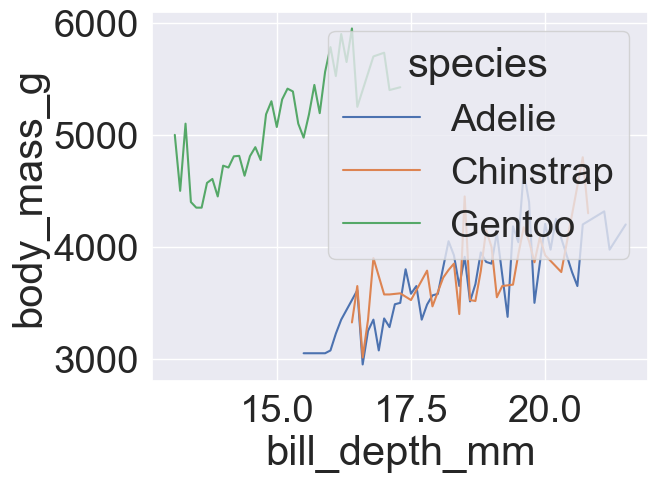

In [47]:
sns.lineplot(data=df,x='bill_depth_mm',y='body_mass_g',errorbar=None, hue='species')
plt.show()

### 펭귄 종별 부리길이와 체중 관계
대략적으로 상관있는 것 같으니까 이 feature는 유의미 해보인다

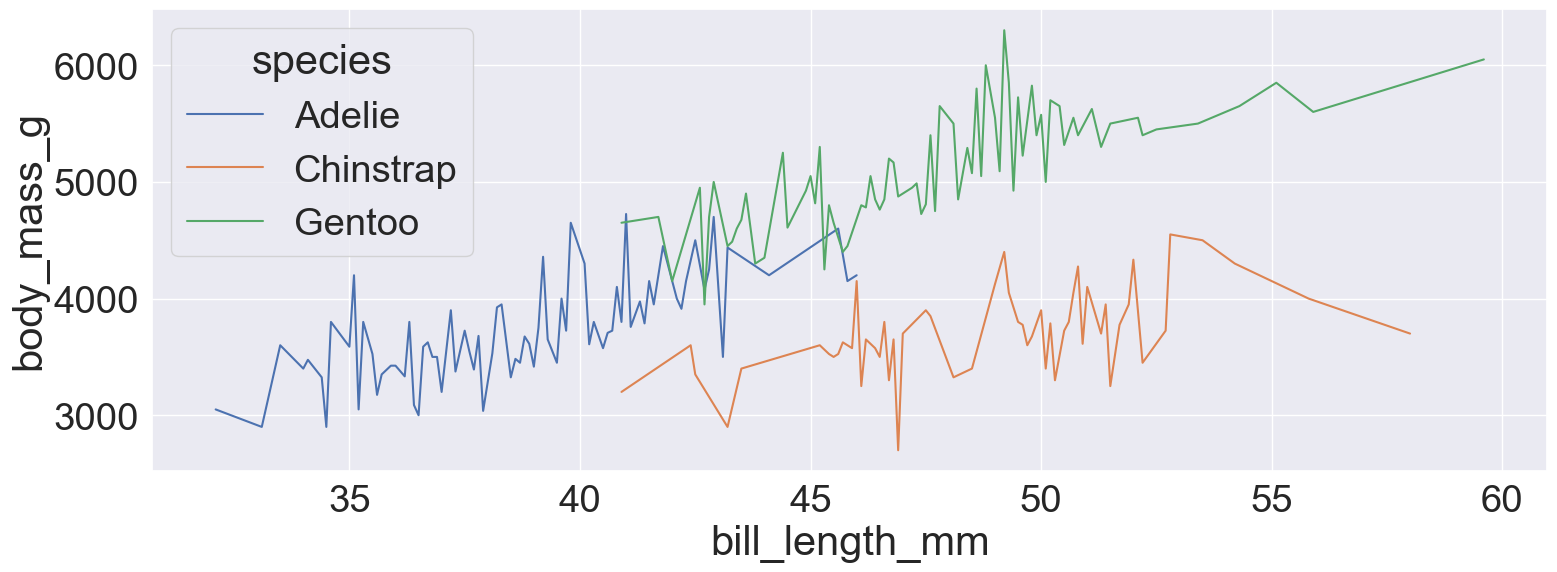

In [45]:
f,ax = plt.subplots(1,1,figsize=(18,6))
sns.lineplot(data=df,x='bill_length_mm',y='body_mass_g',hue='species',errorbar=None,ax=ax)
plt.show()

### 부리의 표면적(길이 x 폭)은 체중과 상관있을까?
전체로 놓고보면 피어슨 상관계수 = 0.1이지만 종별로 나눠보면 경향성 있는거 같긴함.

In [49]:
# 부리의 표면적은 몸무게와 상관있을까 싶었는데 상관계수 0.1 나옴. 이정도면 버려야지
df['bill_area'] = df['bill_length_mm'] * df['bill_depth_mm']

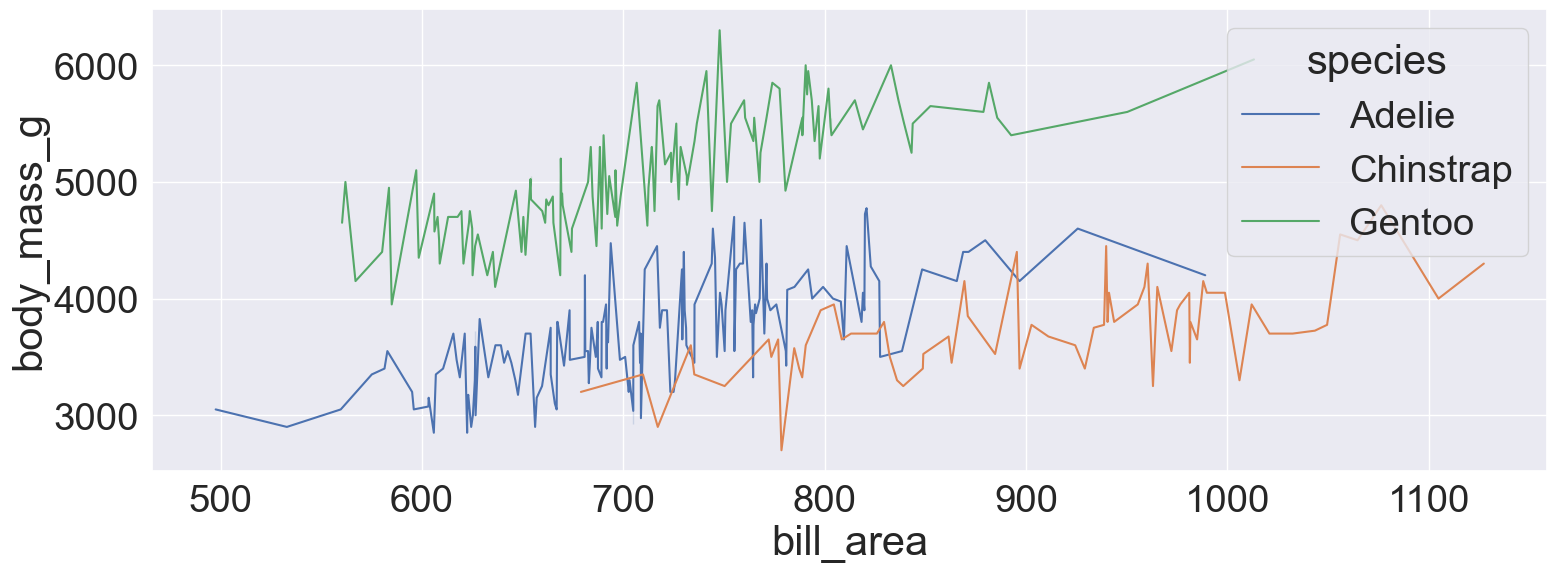

,bill_area,body_mass_g
bill_area,1.000000,0.108206
body_mass_g,0.108206,1.000000


In [50]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df,x='bill_area',y='body_mass_g', hue='species')
plt.show()

df[['bill_area','body_mass_g']].corr()

### Scatterplot으로 보니까 확실히 클래스가 나뉘는거 같은데?

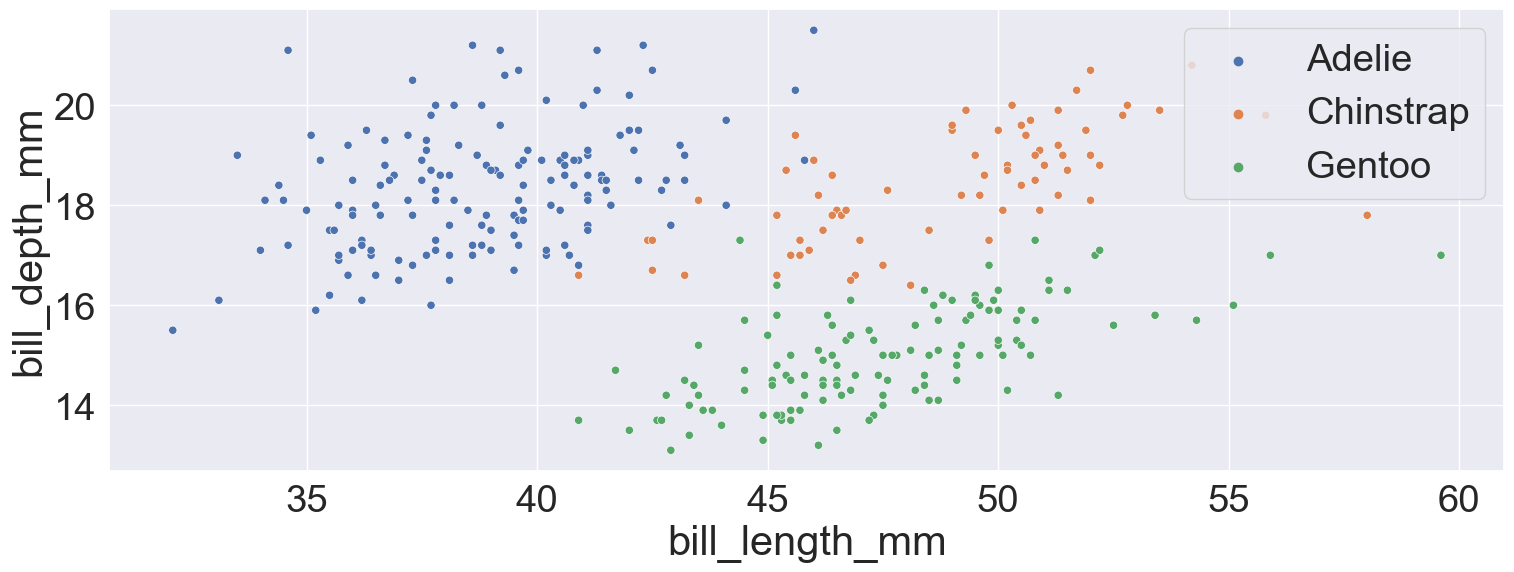

In [74]:
f,ax = plt.subplots(1,1, figsize=(18,6))
sns.scatterplot(data=df,x='bill_length_mm',y='bill_depth_mm',hue='species', ax=ax)
plt.legend()
plt.show()

# EDA - Sex

### 성별에 따른 체중 관계
수컷의 체중이 무거운 편<br>
수컷암컷 비율은 환상적인 1:1

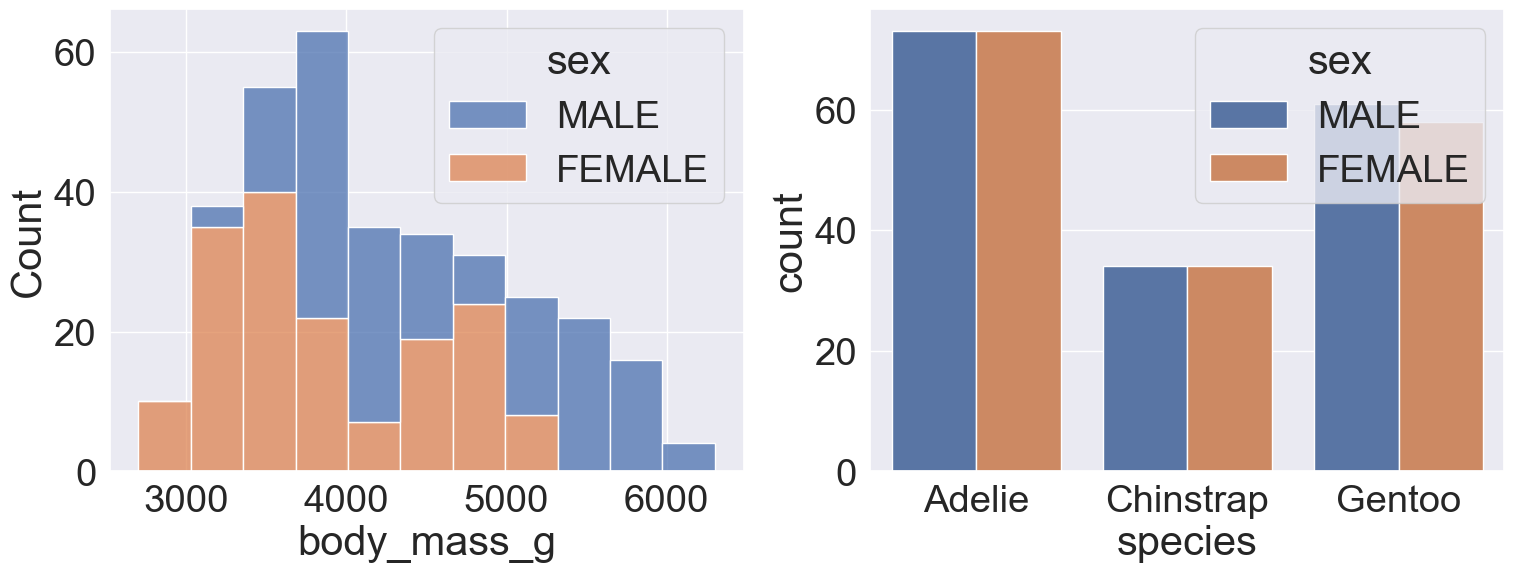

In [65]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.histplot(data=df,x='body_mass_g',hue='sex', multiple='stack',ax=ax[0])
sns.countplot(data=df,x='species',hue='sex',ax=ax[1])
plt.show()

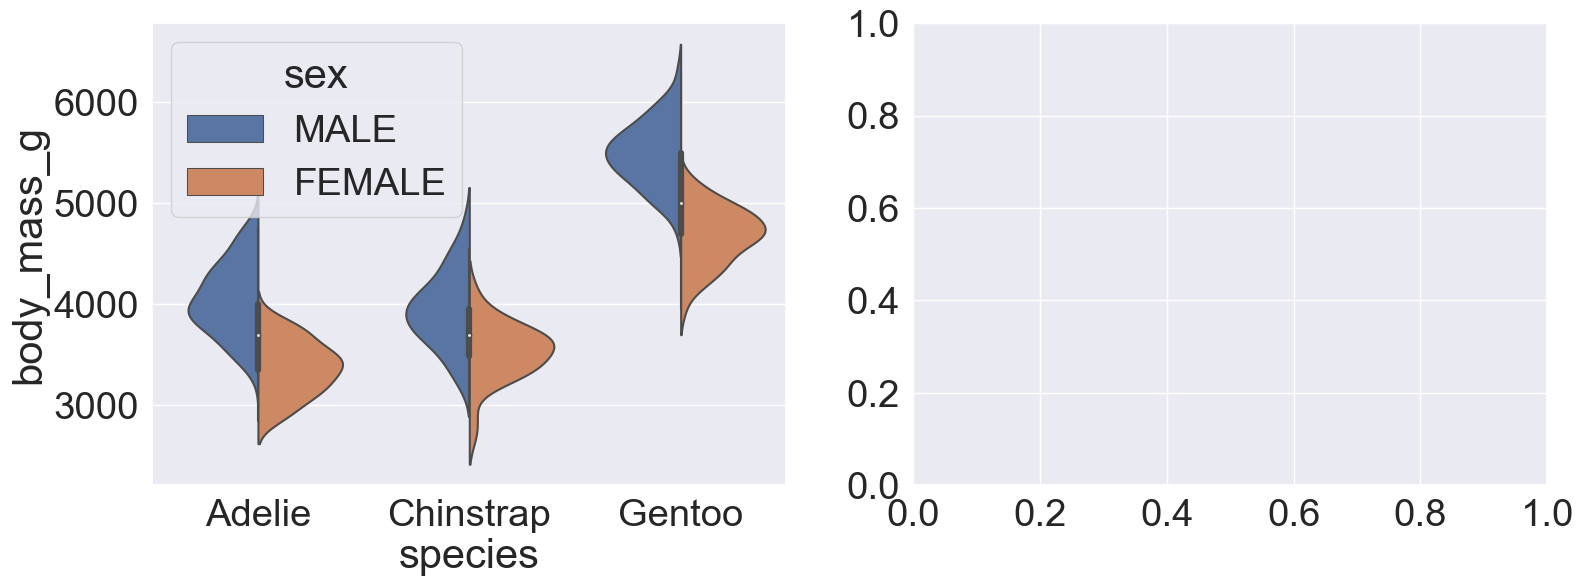

In [66]:
# data=df[df['sex']=='Male'],x='body_mass_g',hue='species'
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.violinplot(data=df, x='species',y='body_mass_g',hue='sex', split=True,ax=ax[0])
plt.show()

# EDA - Flipper_length_mm

### 날개길이와 체중의 관계
우선 피어슨 상관계수는 0.87로 굉장히 높은 편이라서 체크해봐야함<br>
양의 상관관계는 있다. 젠투는 확실하게 분포범위가 구분이 되지만 아델리/턱끈 펭귄은 구분이 어려움

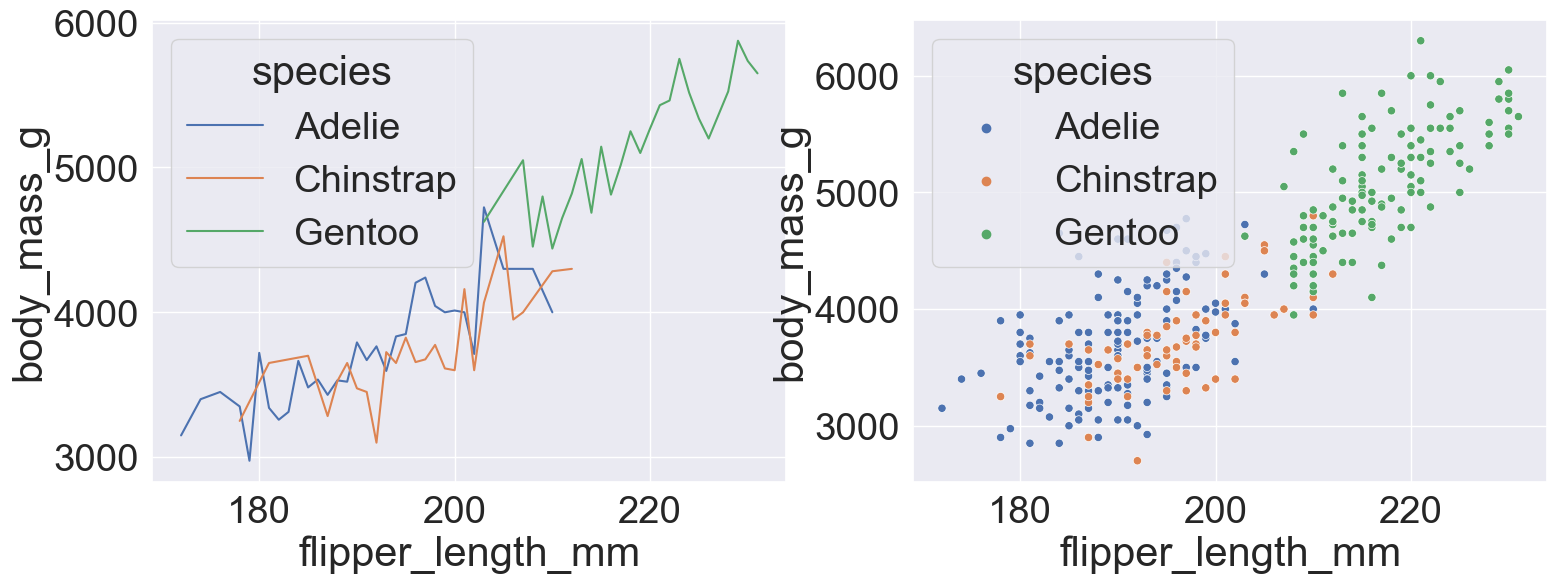

In [55]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.lineplot(data=df,x='flipper_length_mm',y='body_mass_g',hue='species',ax=ax[0], errorbar=None)
sns.scatterplot(data=df,x='flipper_length_mm',y='body_mass_g',hue='species',ax=ax[1])
plt.show()

# EDA - Island

### 섬이 체중에 영향을 줄지 생각해봤음
1. 젠투와 턱끈은 섬 하나 밖에 살지 않는다.
2. 아델리를 통해 추론하자면 섬은 체중에 영향을 주지 않는다. 각 개체의 고유한 범위값이 존재할 뿐.

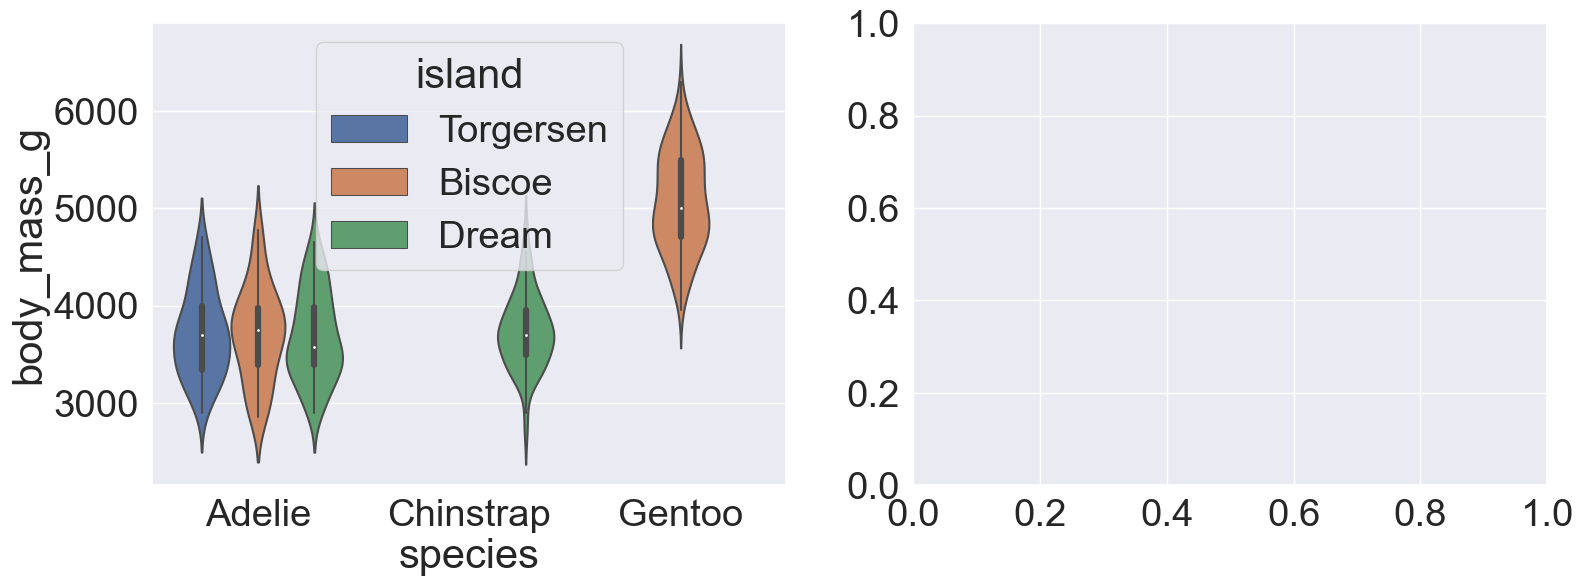

In [68]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.violinplot(data=df,x='species',y='body_mass_g',hue='island',ax=ax[0])
plt.show()

# 지금까지의 생각 정리

문제를 <u>species classification</u>로 정의 

species : target class<br>
island : 특정 섬에는 특정 종만 사니까 유효한 feature<br>
bill_length, bill_depth : 각 종 안에서는 두 feature의 상관계수가 0.6 ~ 0.7이므로 그냥 둘을 곱한 값을 파생변수로 만들어 사용한다.<br>
flipper : 젠투만큼은 확실하게 구분이 가능하므로 유효하다.<br>
body_mass : 젠투는 체중 범위가 아예 다르다<br>
sex : 같은 종 안에서 수컷이 체중이 더 높긴 하지만 그게 species를 나누는 feature로는 활용하기 힘들어보임. 제외.

# Feature Engineering

### Sex 컬럼은 어차피 안쓸거니까 미리 지우기

In [78]:
df.drop(columns='sex',axis=1,inplace=True)

### Null값 있는 행 그냥 지워버리기

In [84]:
print(df.shape)
df[df.isnull().any(axis=1)]

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_area
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [87]:
df.dropna(inplace=True)


### 인코딩 해줘야함

라벨인코딩해야하나 원핫인코딩해야하나? Decision Tree계열은 Feature에 0이 많을 수록 성능이 떨어지기 때문에 Label Encoding<br>
SVM, Linear Regression, Logistic Regression 같은 경우는 거리 숫자 자체가 의미가 있으므로 One-hot Encoding

In [93]:
df['species']=df['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
df['island']=df['island'].map({'Torgersen':0,'Dream':1,'Biscoe':2})

In [96]:
df.drop(columns=['bill_length_mm','bill_depth_mm'],inplace=True)

# Machine Learning

### 모델 - RandomForest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# # 1. X,y 정의하기
X = df.drop(columns='species')
y = df['species']
# # 2. train, valid나누기 0.7 : 0.3
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)
# # 3. 모델 적용
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_valid)
# # 4. metrics 계산
score = metrics.accuracy_score(prediction,y_valid)

In [100]:
print(score)

0.941747572815534


### 모델 - SVM